We should show the raw data distribution of the bandgap first in our final report. So this distributions or other distributions before performing ML on it can be done in this notebook

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("../data/RDKit/rdkit_only_valid_smiles_qm9.pkl")
# Check the info of the dataframe, especially important is the dtypes of the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129012 entries, 0 to 129011
Columns: 219 entries, MaxAbsEStateIndex to gaps
dtypes: float64(108), int64(110), object(1)
memory usage: 215.6+ MB
None


In [3]:
x = df['gaps']
print(x)
print(min(x))
print(max(x))

0         13.736308
1          9.249149
2          9.836916
3          9.118535
4         10.329442
            ...    
129007     8.723970
129008     9.064113
129009     8.035522
129010     8.171579
129011     8.321241
Name: gaps, Length: 129012, dtype: float64
0.6694000959396362
16.928203582763672


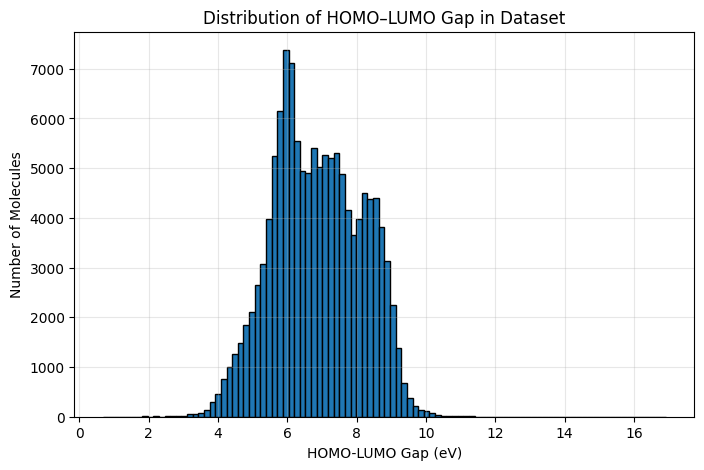

In [5]:
plt.figure(figsize=(8,5))
plt.hist(x, bins=100, edgecolor='black')
plt.xlabel('HOMO-LUMO Gap (eV)')
plt.ylabel('Number of Molecules')
plt.title('Distribution of HOMO–LUMO Gap in Dataset')
plt.grid(alpha=0.3)
plt.show()

In [ ]:

from rdkit import Chem
def count_c_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # invalid SMILES
    return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == "C")

# Apply to your dataframe
df["num_carbons"] = df["SMILES"].apply(count_c_atoms)
print(df["num_carbons"])

0         1
1         0
2         0
3         2
4         1
         ..
129007    8
129008    8
129009    7
129010    8
129011    7
Name: num_carbons, Length: 129012, dtype: int64


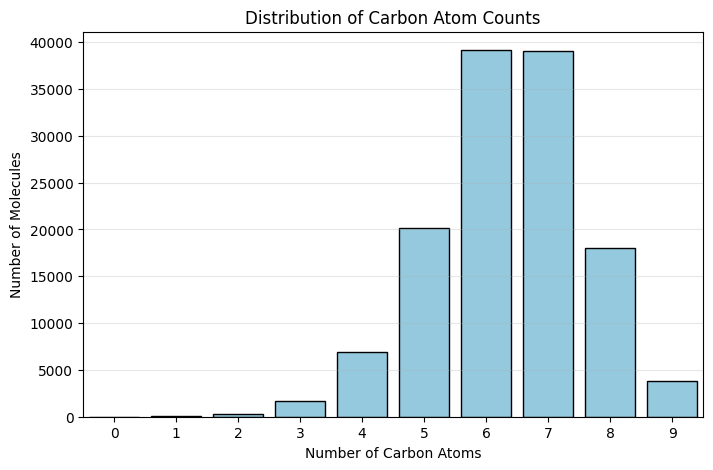

In [ ]:

import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="num_carbons", data=df, color="skyblue", edgecolor="black")

plt.xlabel("Number of Carbon Atoms")
plt.ylabel("Number of Molecules")
plt.title("Distribution of Carbon Atom Counts")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()


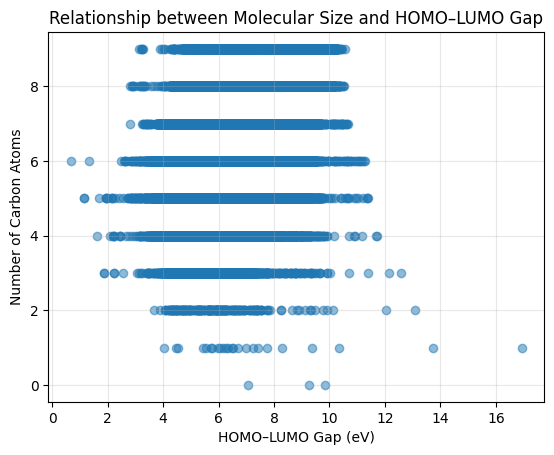

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, df["num_carbons"], alpha=0.5)
plt.ylabel("Number of Carbon Atoms")
plt.xlabel("HOMO–LUMO Gap (eV)")
plt.title("Relationship between Molecular Size and HOMO–LUMO Gap")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
no_carbons = df[df["num_carbons"] == 0]
print(no_carbons)


     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
1             0.000000        0.000000              0.000           0.000   
2             0.000000        0.000000              0.000           0.000   
172           3.861111        3.861111              2.875           2.875   

          qed  SPS   MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
1    0.397555  0.0  17.031          14.007   17.026549                    8   
2    0.327748  0.0  18.015          15.999   18.010565                    8   
172  0.387251  8.0  72.027          72.027   72.007211                   26   

     ...  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
1    ...                  0             0            0            0   
2    ...                  0             0            0            0   
172  ...                  0             0            0            0   

     fr_thiophene  fr_unbrch_alkane  fr_urea        SMILES      gaps  \
1               0

['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'S

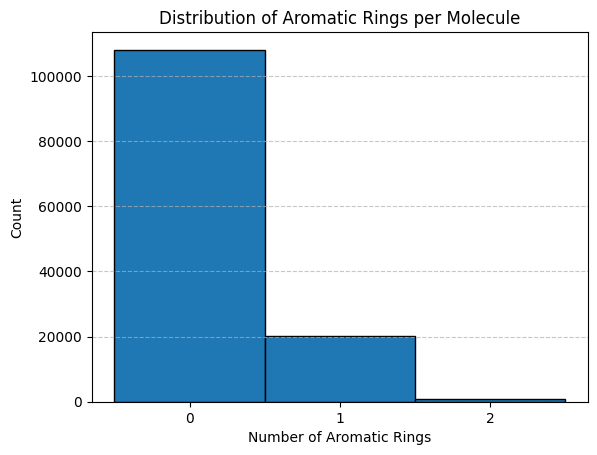

In [ ]:

columns = df.columns.tolist()
print(columns)

# Example column
x = df["NumAromaticRings"]

# Compute integer range for bins
bins = np.arange(x.min() - 0.5, x.max() + 1.5, 1)

plt.hist(x, bins=bins, edgecolor='black')
plt.xticks(range(int(x.min()), int(x.max()) + 1))
plt.xlabel("Number of Aromatic Rings")
plt.ylabel("Count")
plt.title("Distribution of Aromatic Rings per Molecule")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

fr_ketone
0    114187
1     14181
2       634
3        10
Name: count, dtype: int64


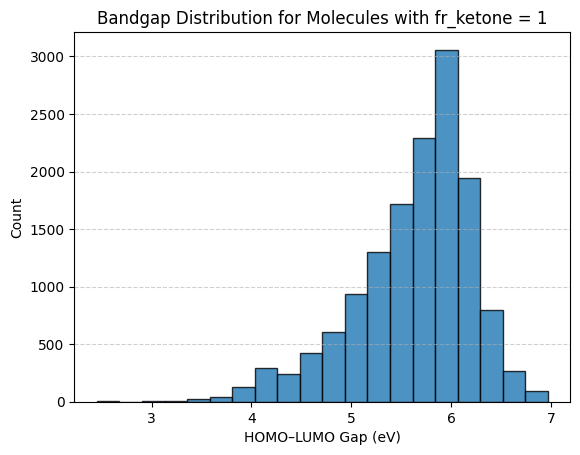

In [ ]:
feature = "fr_ketone"
print(df[feature].value_counts())
subset = df[df[feature] == 1]
plt.hist(subset["gaps"], bins=20, edgecolor='black', alpha=0.8)
plt.xlabel("HOMO–LUMO Gap (eV)")
plt.ylabel("Count")
plt.title(f"Bandgap Distribution for Molecules with {feature} = 1")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:

def plot_feature_gap_distribution(df, feature, gap_col='gaps'):
    data = df[df[feature] > 0]  # exclude zeros
    if data.empty:
        return  # skip if no nonzero entries

    values = sorted(data[feature].unique())
    plt.figure(figsize=(6, 4))

    colors = sns.color_palette("husl", len(values))  # nice color set

    for i, val in enumerate(values):
        subset = data[data[feature] == val]
        plt.hist(
            subset[gap_col],
            bins=20,
            alpha=0.6,
            color=colors[i],
            label=f"{feature}={val} (n={len(subset)})",
            edgecolor='black'
        )

    plt.xlabel("HOMO-LUMO Gap (eV)")
    plt.ylabel("Count")
    plt.title(f"Distribution of {gap_col} for {feature} values")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


Plotting: NumValenceElectrons


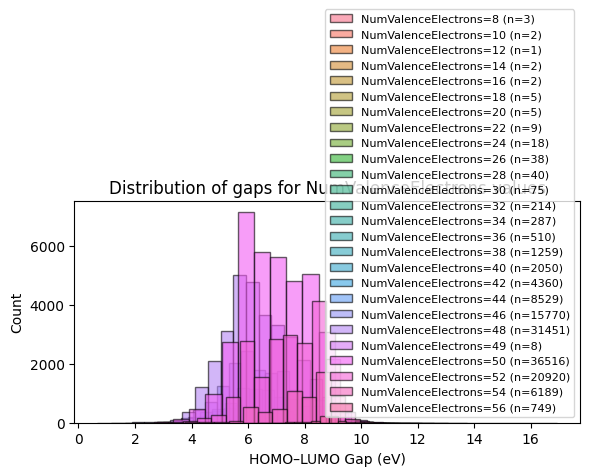

Plotting: NumRadicalElectrons


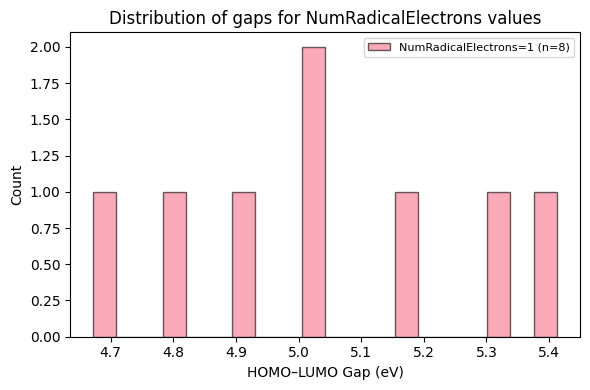

Plotting: NumAliphaticCarbocycles


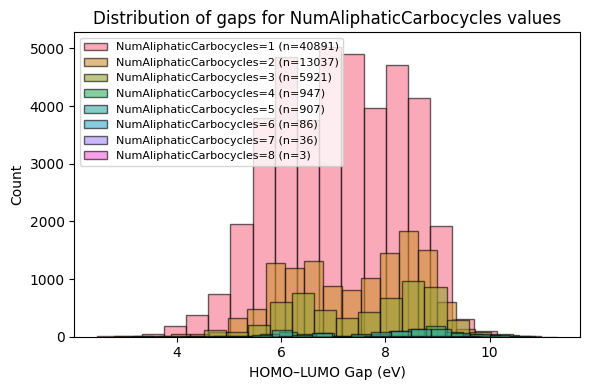

Plotting: NumAliphaticHeterocycles


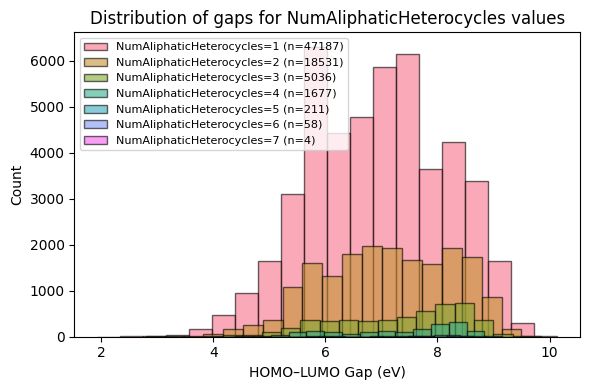

Plotting: NumAliphaticRings


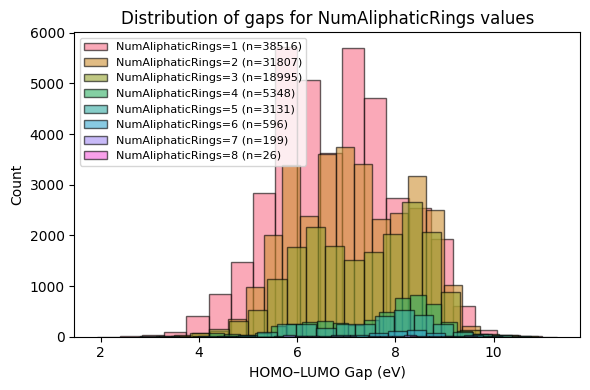

Plotting: NumAmideBonds


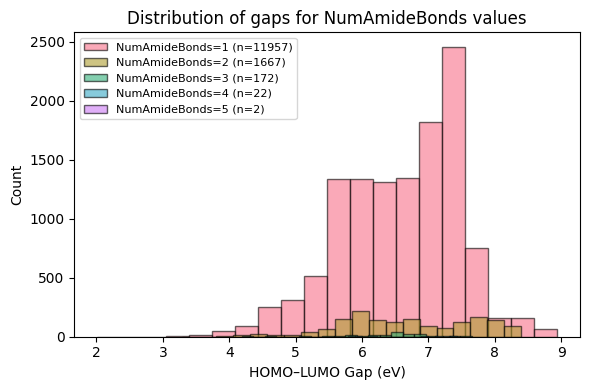

Plotting: NumAromaticCarbocycles


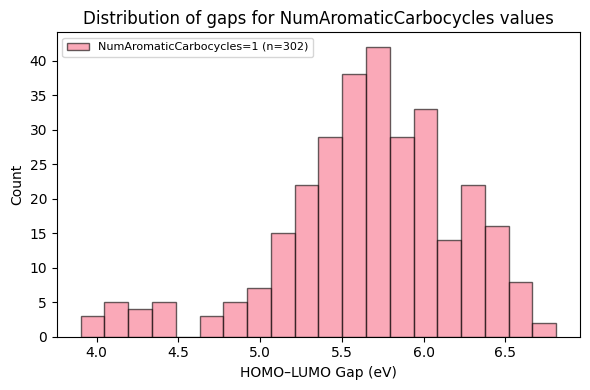

Plotting: NumAromaticHeterocycles


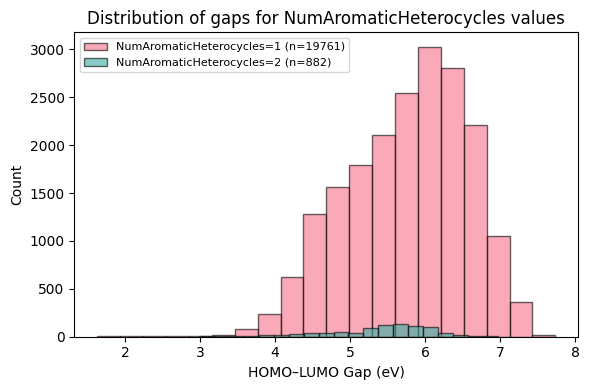

Plotting: NumAromaticRings


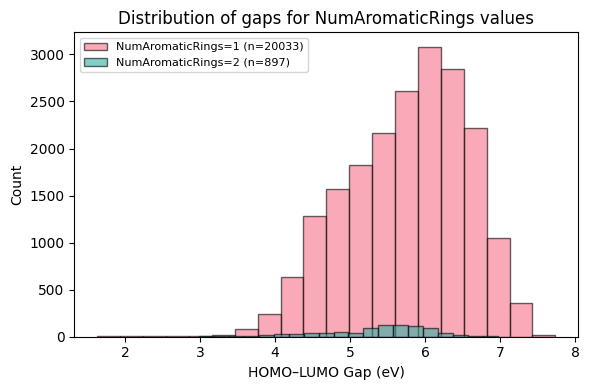

Plotting: NumAtomStereoCenters


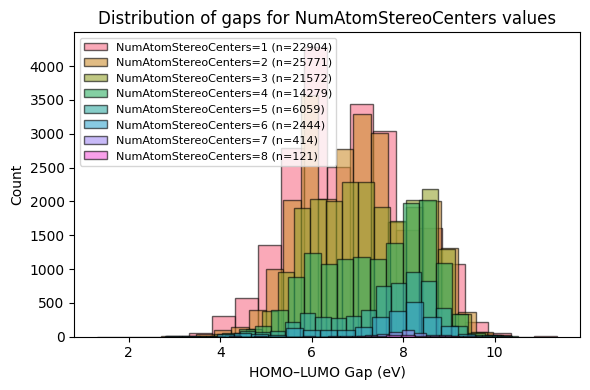

Plotting: NumBridgeheadAtoms


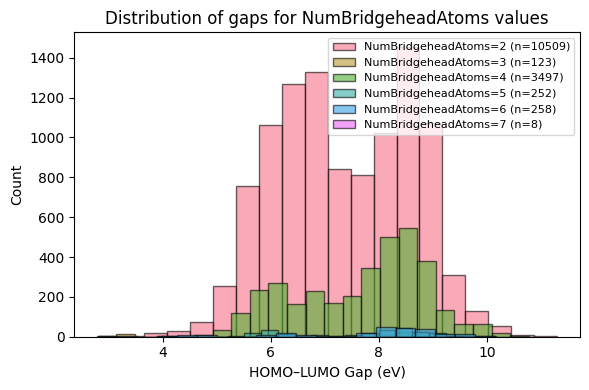

Plotting: NumHAcceptors


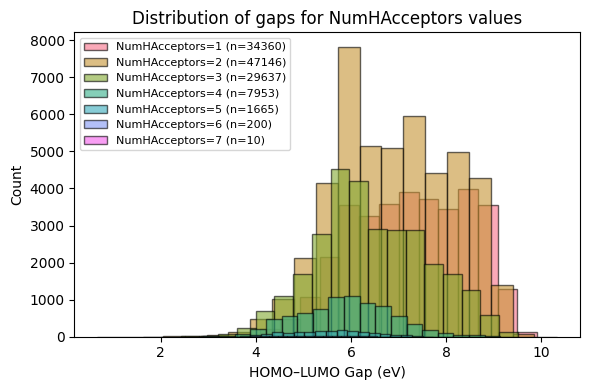

Plotting: NumHDonors


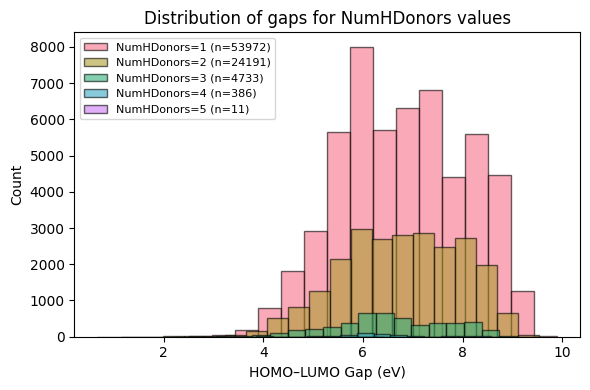

Plotting: NumHeteroatoms


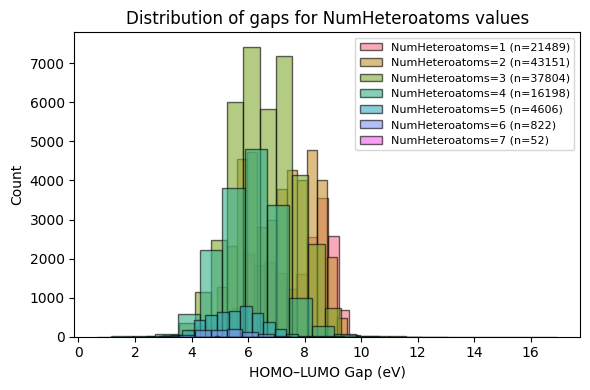

Plotting: NumHeterocycles


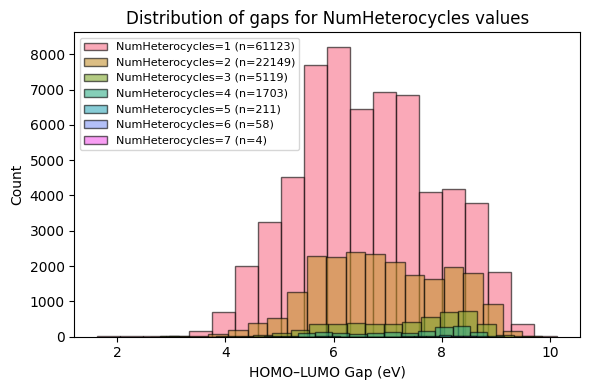

Plotting: NumRotatableBonds


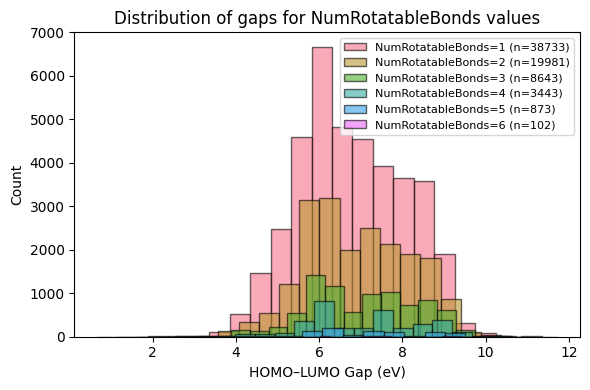

Plotting: NumSaturatedCarbocycles


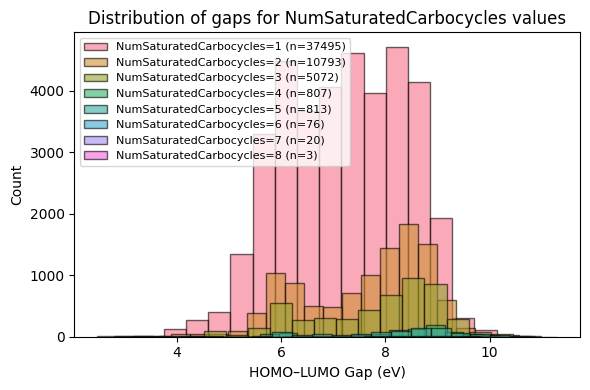

Plotting: NumSaturatedHeterocycles


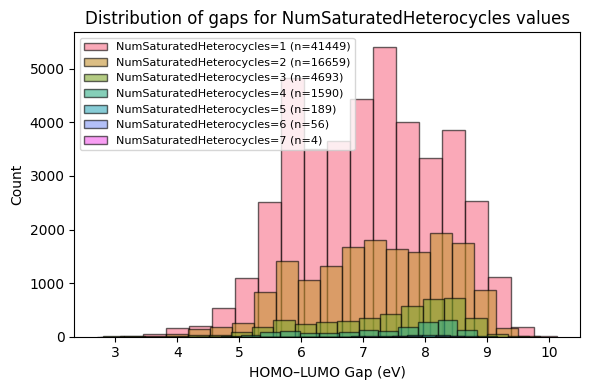

Plotting: NumSaturatedRings


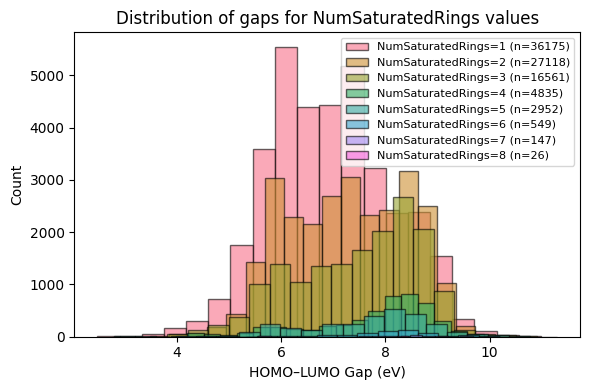

Plotting: NumSpiroAtoms


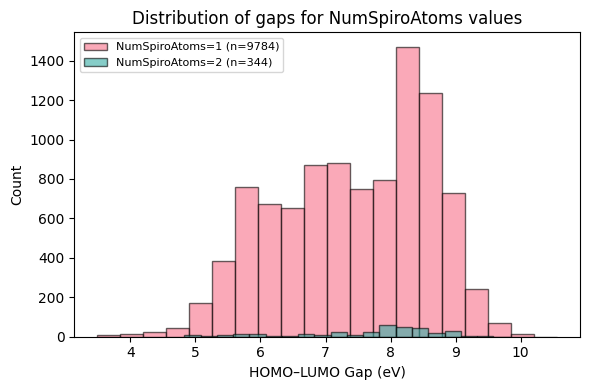

Plotting: NumUnspecifiedAtomStereoCenters


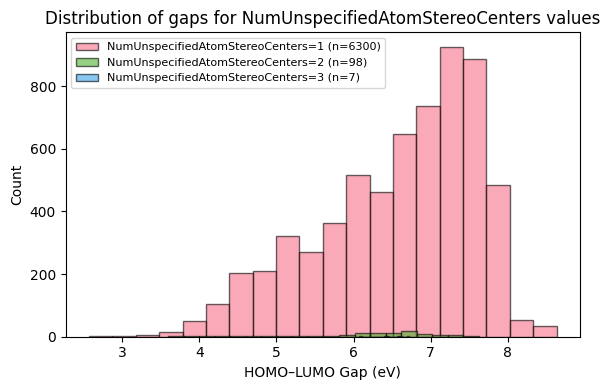

Plotting: fr_Al_COO


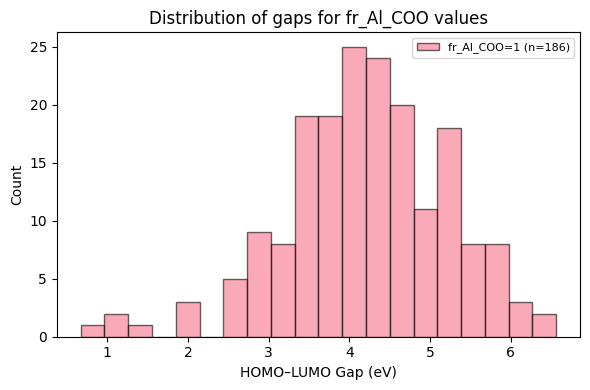

Plotting: fr_Al_OH


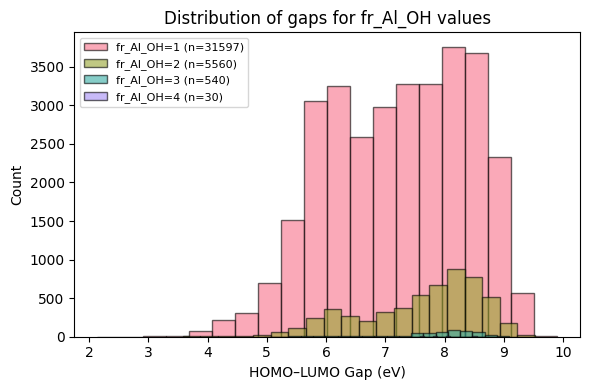

Plotting: fr_Al_OH_noTert


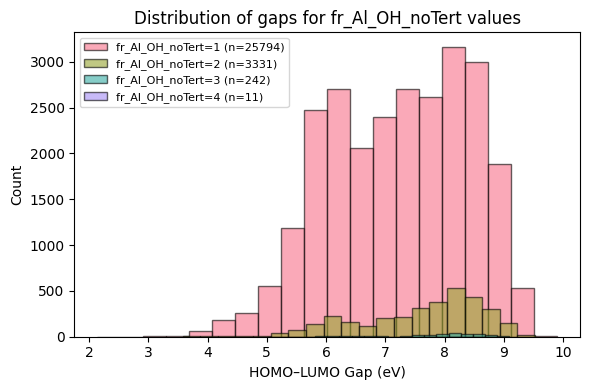

Plotting: fr_ArN


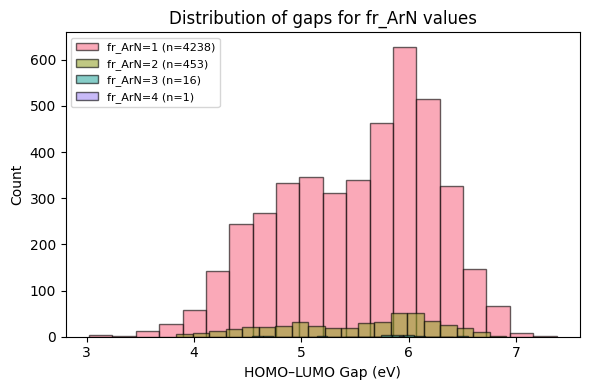

Plotting: fr_Ar_COO


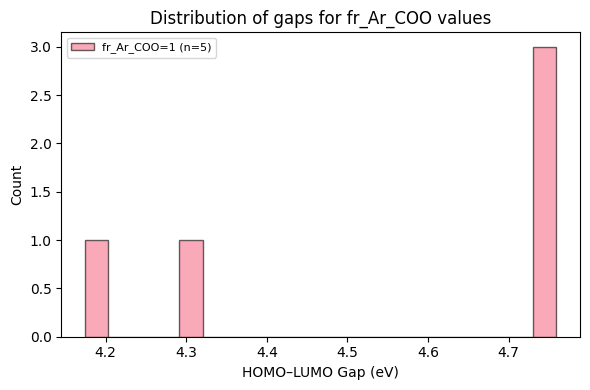

Plotting: fr_Ar_N


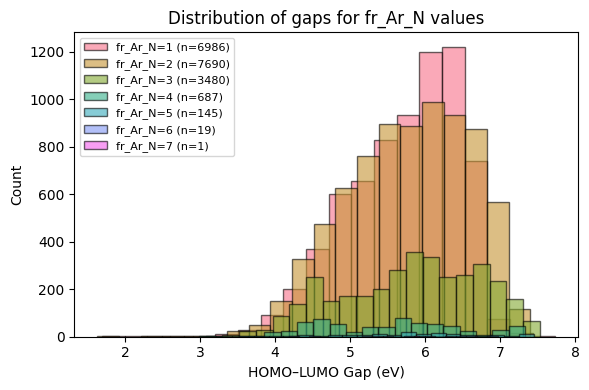

Plotting: fr_Ar_NH


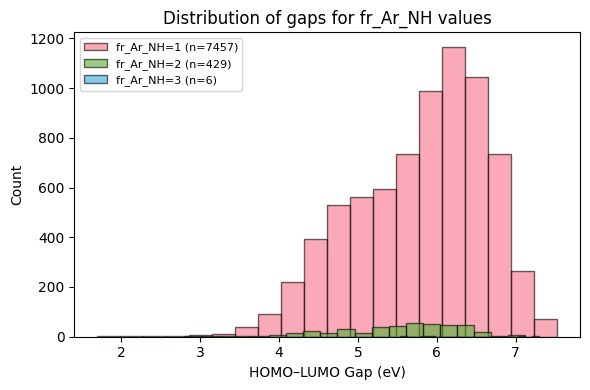

Plotting: fr_Ar_OH


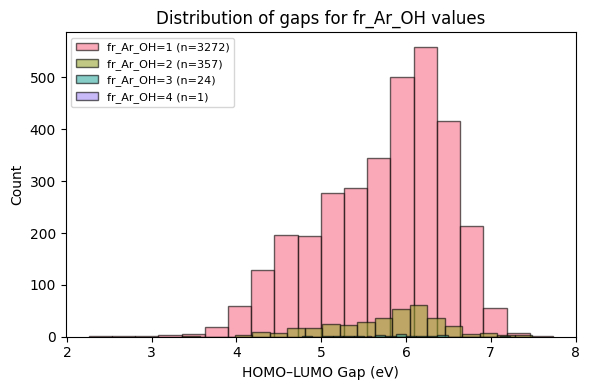

Plotting: fr_COO


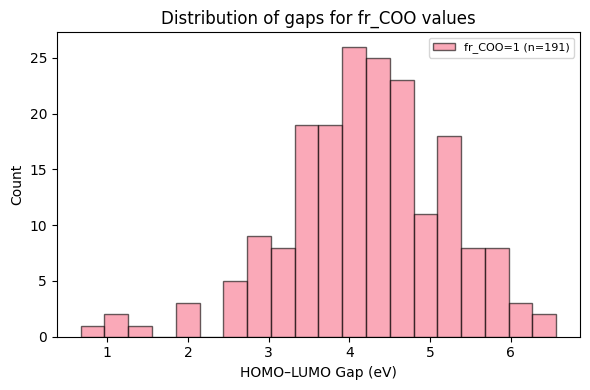

Plotting: fr_COO2


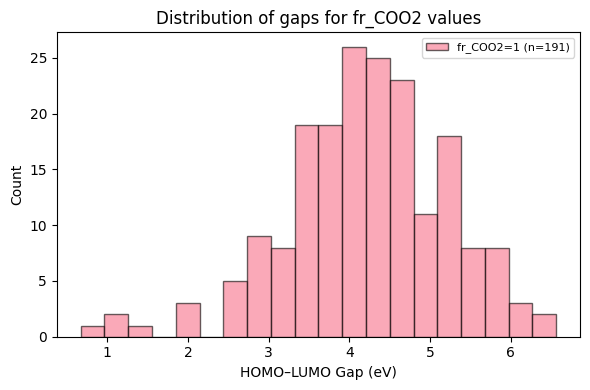

Plotting: fr_C_O


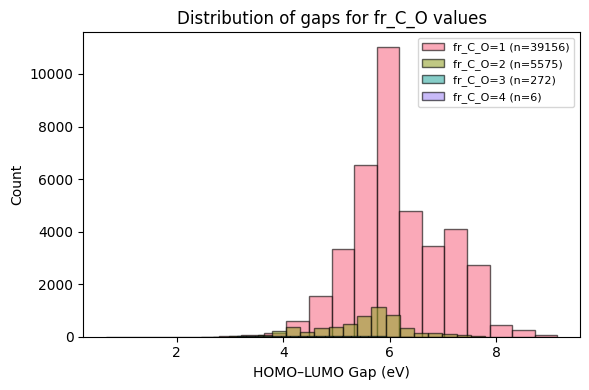

Plotting: fr_C_O_noCOO


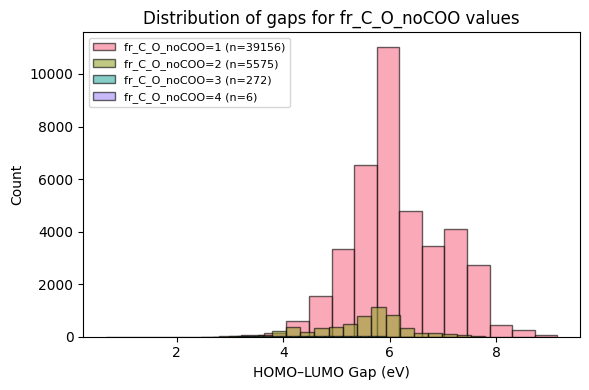

Plotting: fr_C_S
Plotting: fr_HOCCN


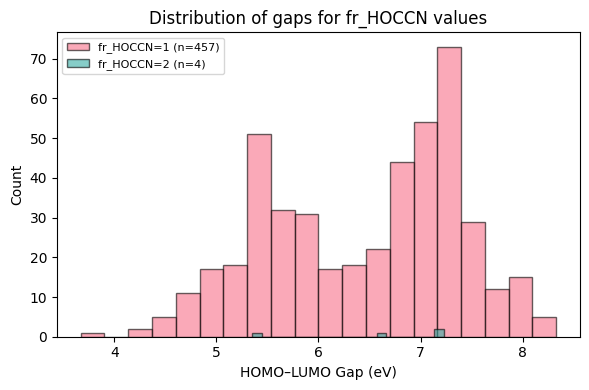

Plotting: fr_Imine


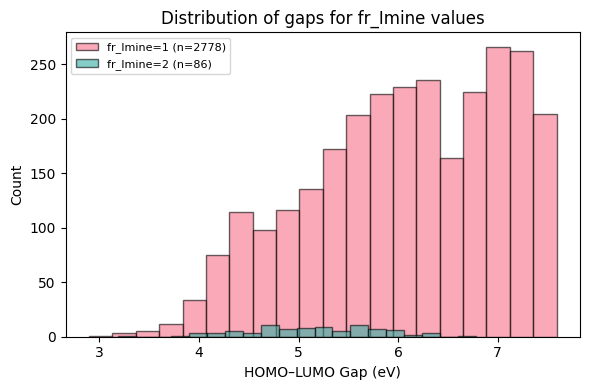

Plotting: fr_NH0


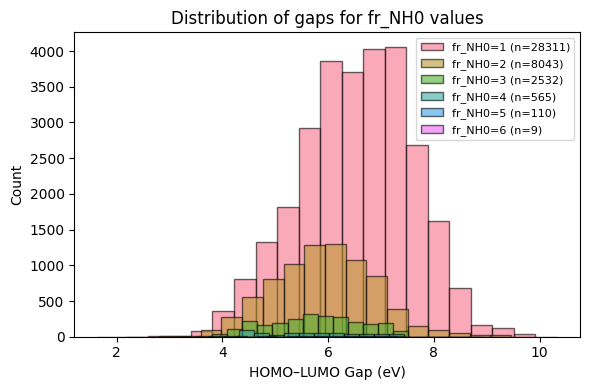

Plotting: fr_NH1


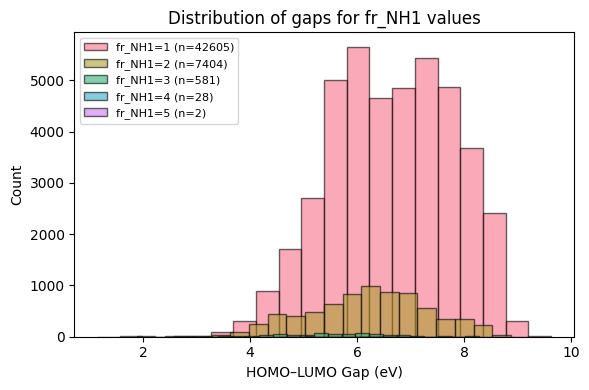

Plotting: fr_NH2


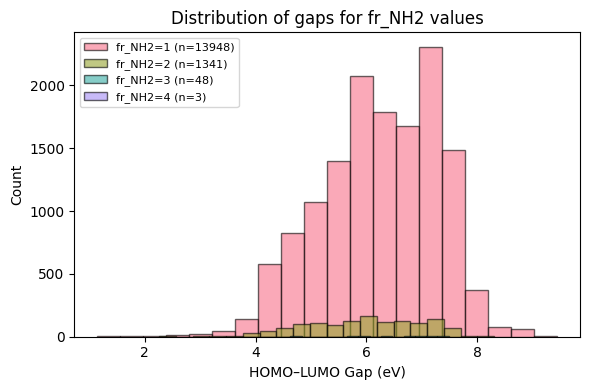

Plotting: fr_N_O


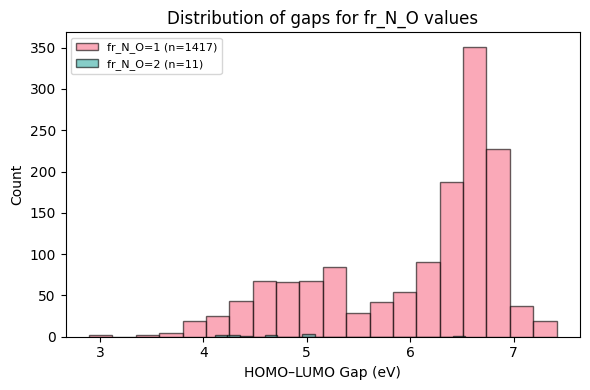

Plotting: fr_Ndealkylation1


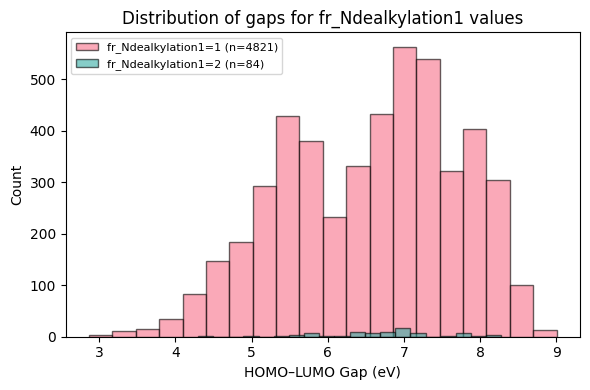

Plotting: fr_Ndealkylation2


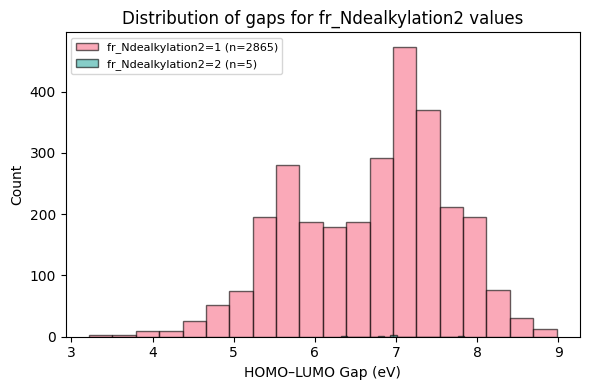

Plotting: fr_Nhpyrrole


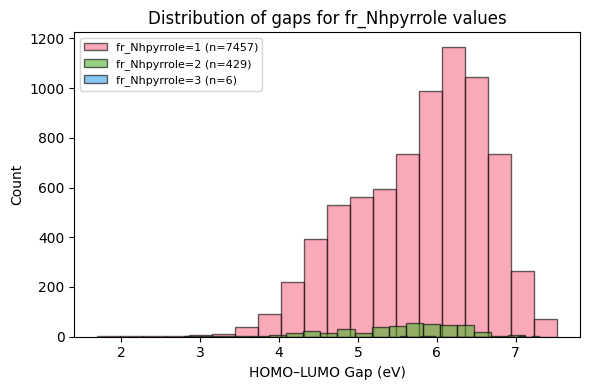

Plotting: fr_SH
Plotting: fr_aldehyde


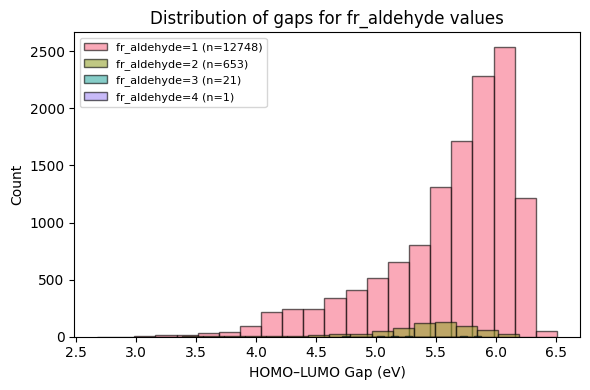

Plotting: fr_alkyl_carbamate


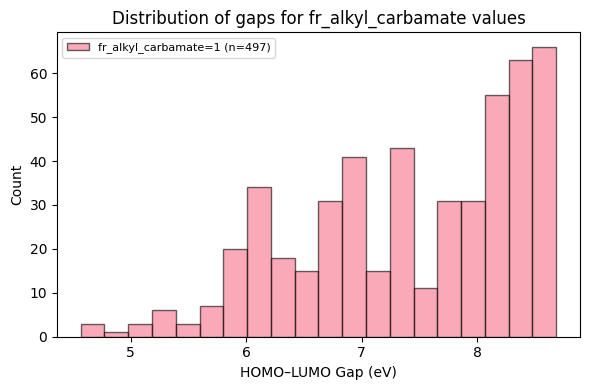

Plotting: fr_alkyl_halide


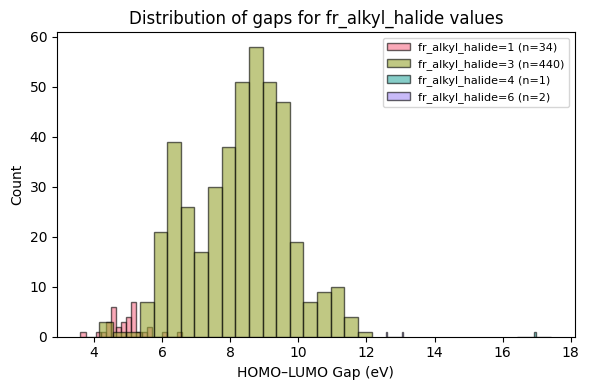

Plotting: fr_allylic_oxid


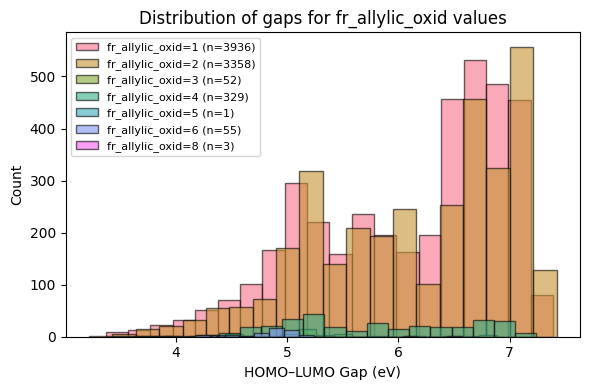

Plotting: fr_amide


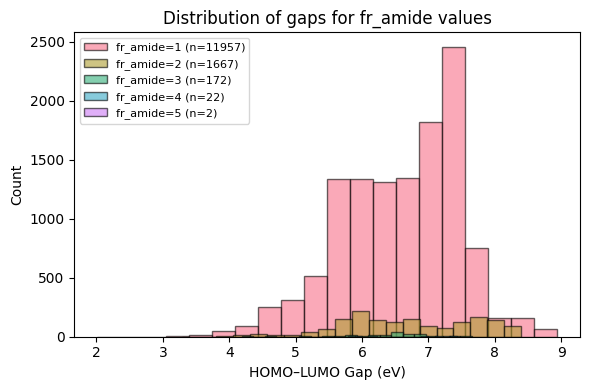

Plotting: fr_amidine


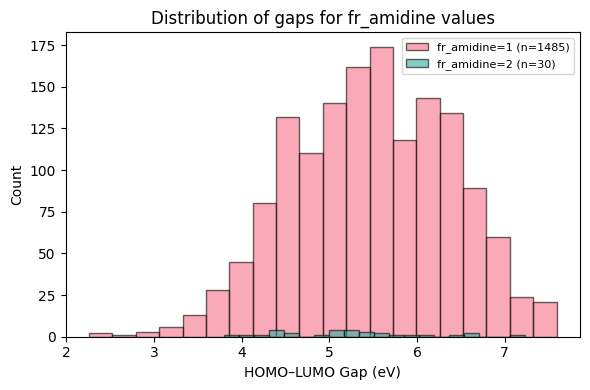

Plotting: fr_aniline


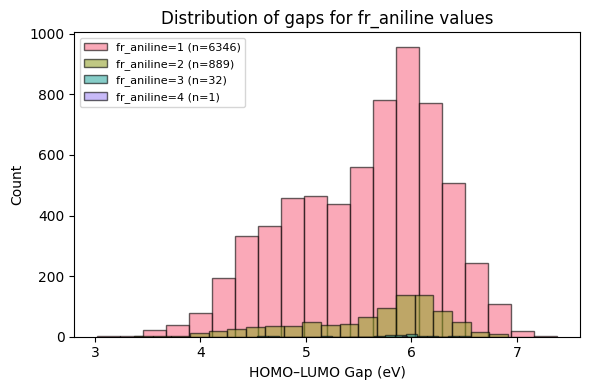

Plotting: fr_aryl_methyl


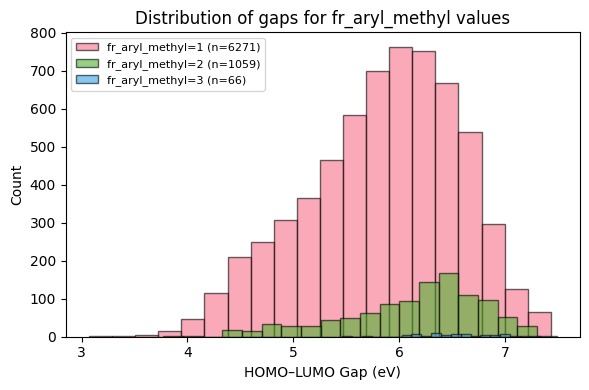

Plotting: fr_azide
Plotting: fr_azo


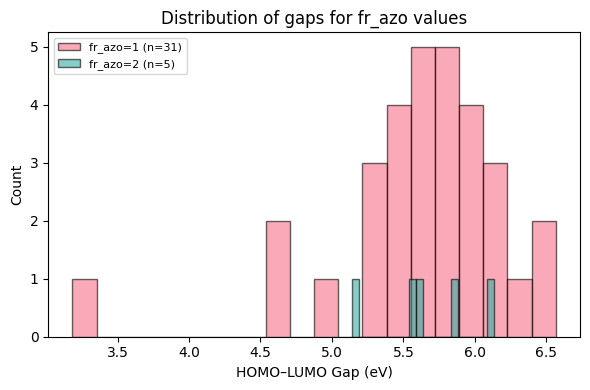

Plotting: fr_barbitur
Plotting: fr_benzene


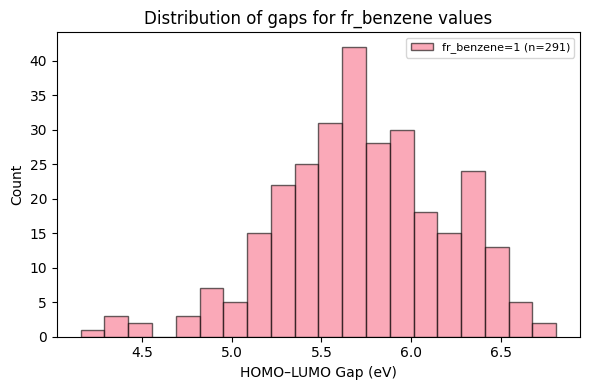

Plotting: fr_benzodiazepine
Plotting: fr_bicyclic


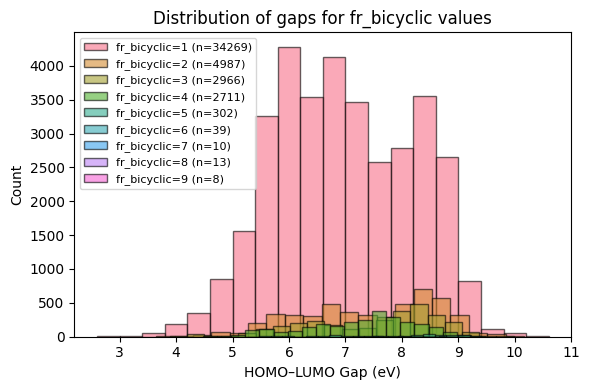

Plotting: fr_diazo
Plotting: fr_dihydropyridine
Plotting: fr_epoxide


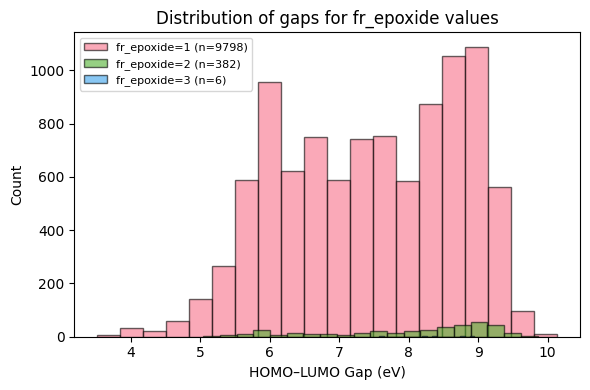

Plotting: fr_ester


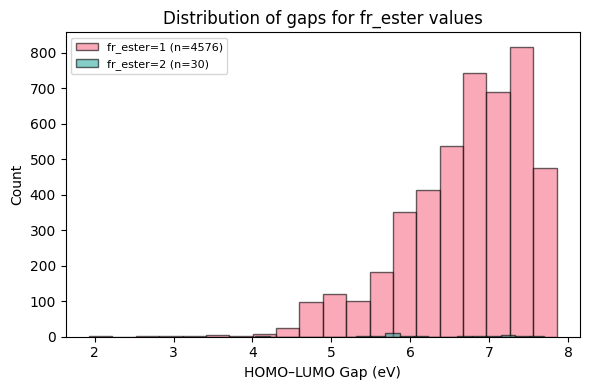

Plotting: fr_ether


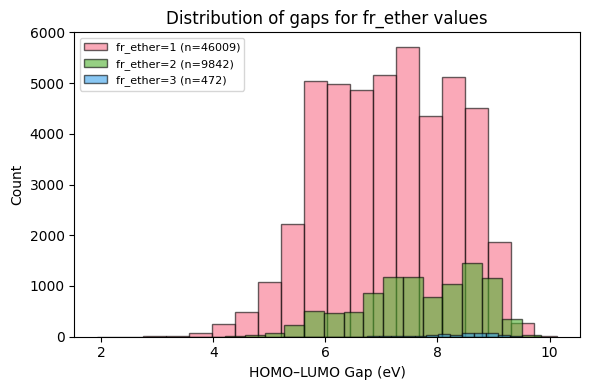

Plotting: fr_furan


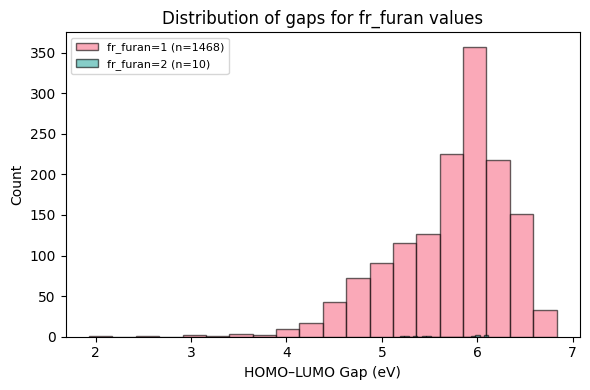

Plotting: fr_guanido


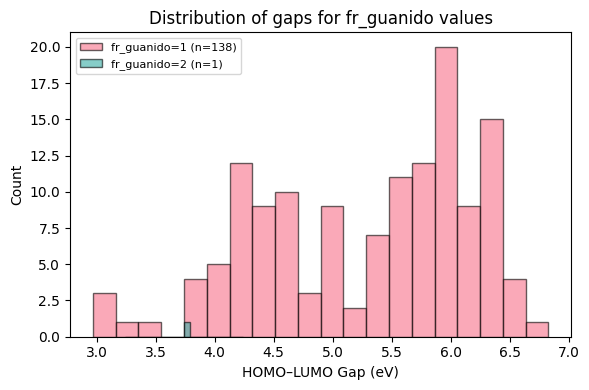

Plotting: fr_halogen


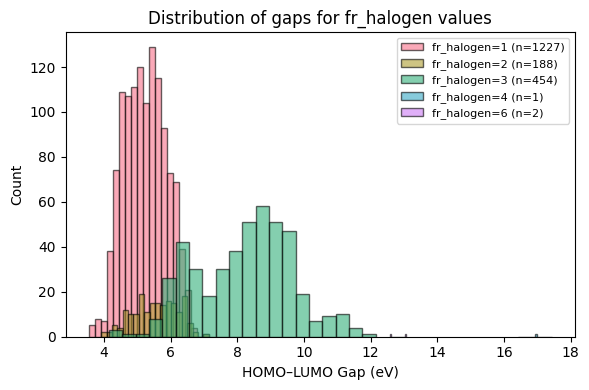

Plotting: fr_hdrzine


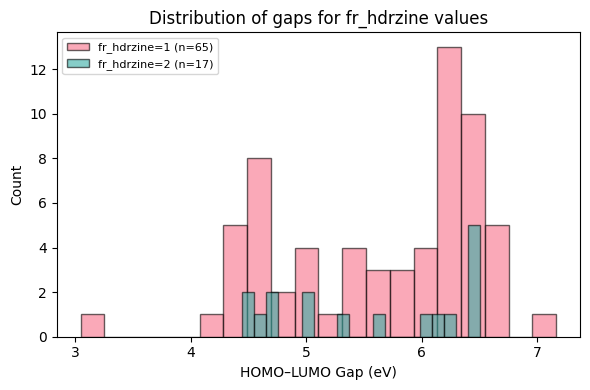

Plotting: fr_hdrzone


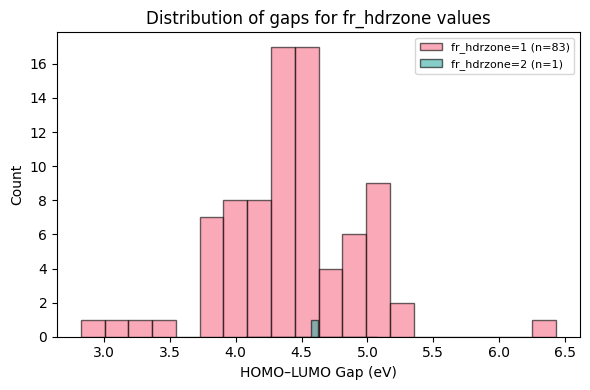

Plotting: fr_imidazole


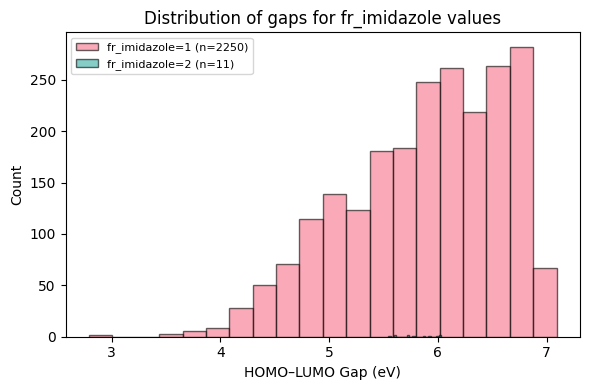

Plotting: fr_imide


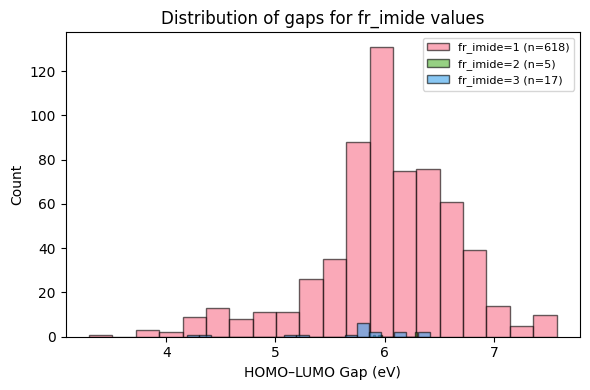

Plotting: fr_isocyan
Plotting: fr_isothiocyan
Plotting: fr_ketone


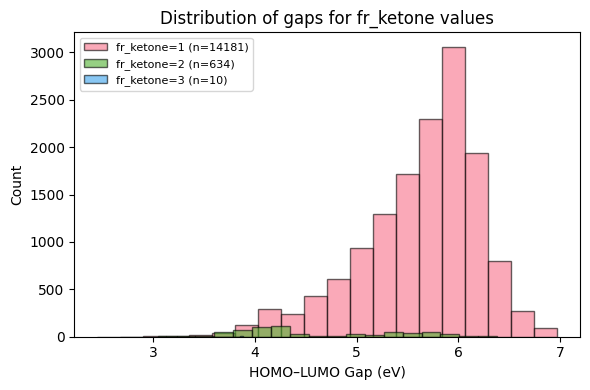

Plotting: fr_ketone_Topliss


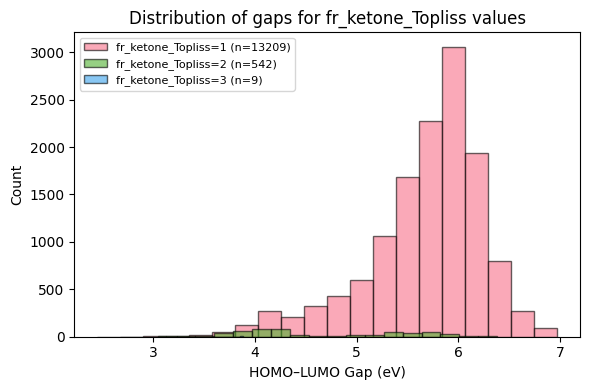

Plotting: fr_lactam


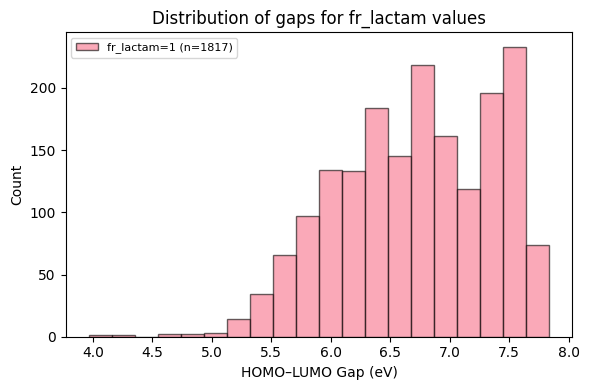

Plotting: fr_lactone


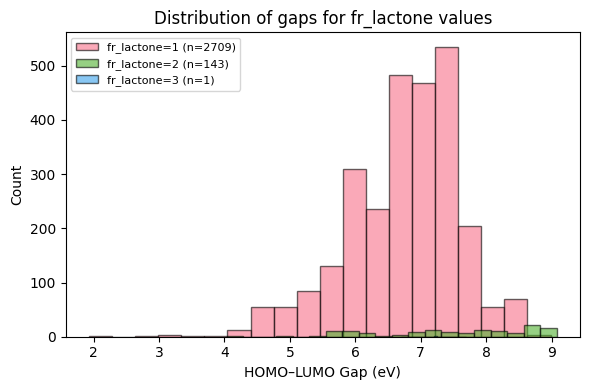

Plotting: fr_methoxy


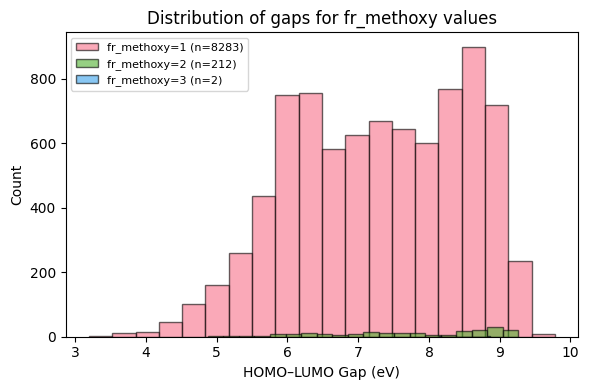

Plotting: fr_morpholine


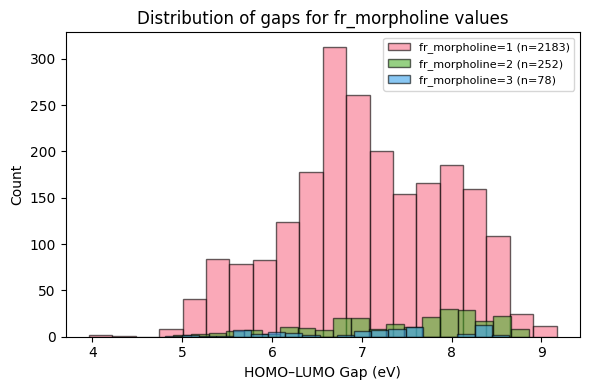

Plotting: fr_nitrile


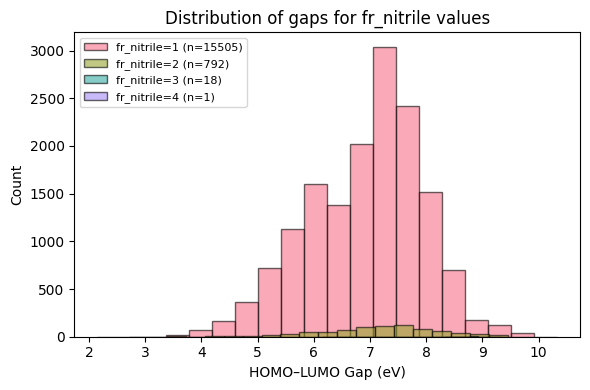

Plotting: fr_nitro


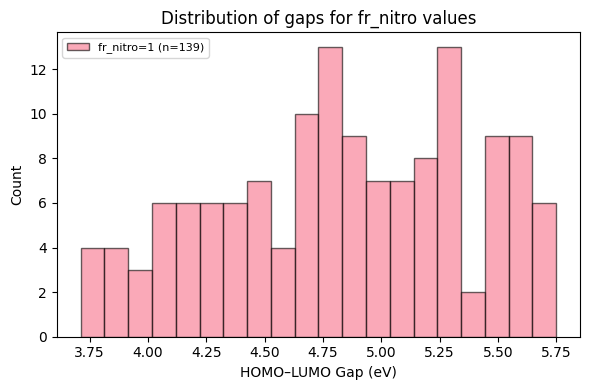

Plotting: fr_nitro_arom


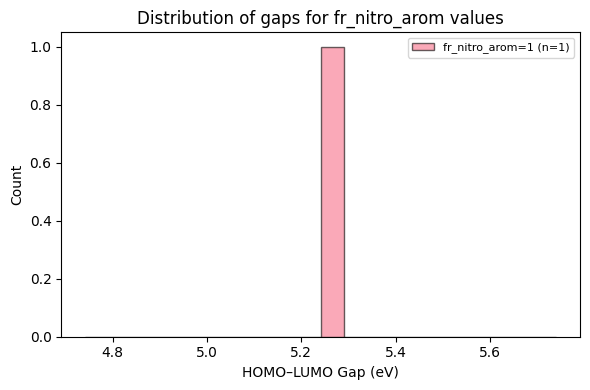

Plotting: fr_nitro_arom_nonortho


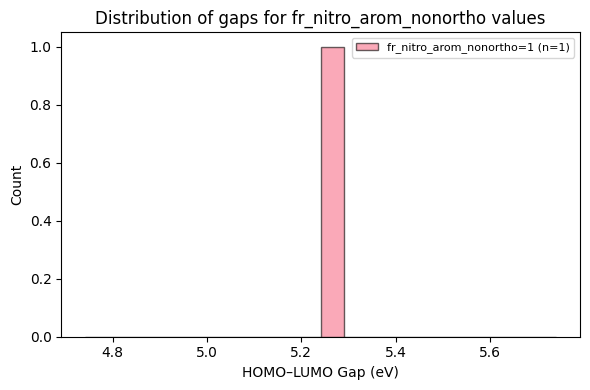

Plotting: fr_nitroso


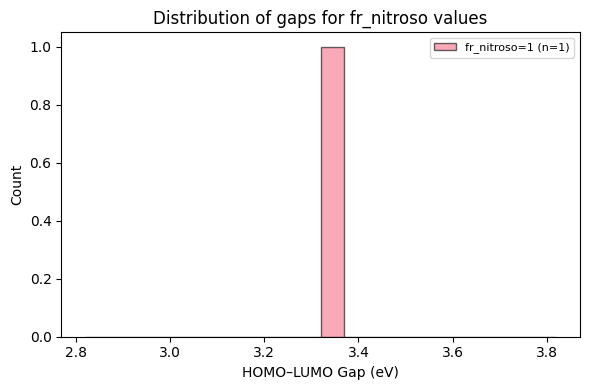

Plotting: fr_oxazole


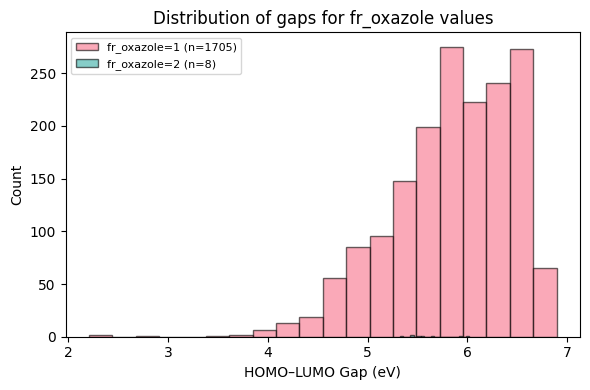

Plotting: fr_oxime


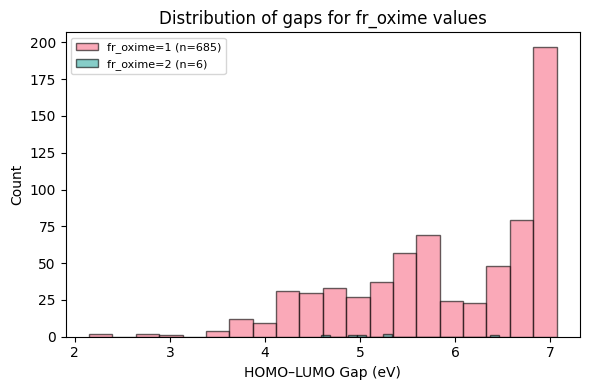

Plotting: fr_para_hydroxylation


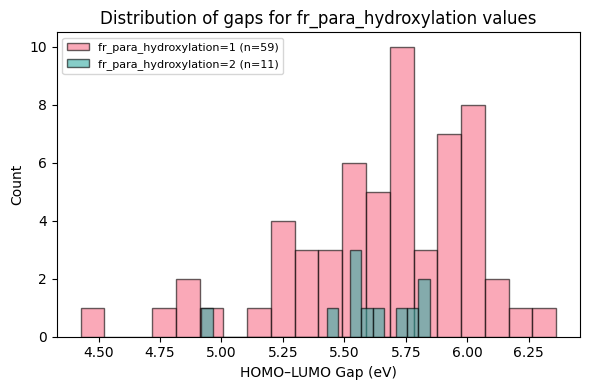

Plotting: fr_phenol


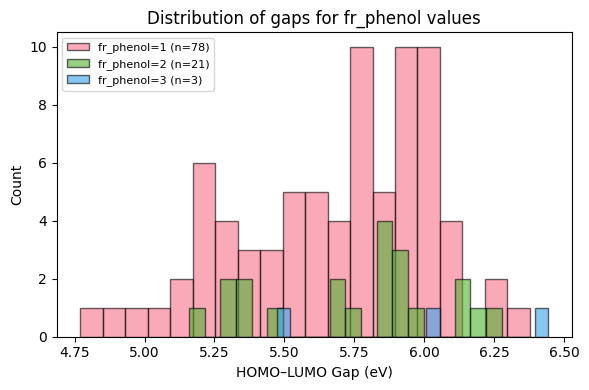

Plotting: fr_phenol_noOrthoHbond


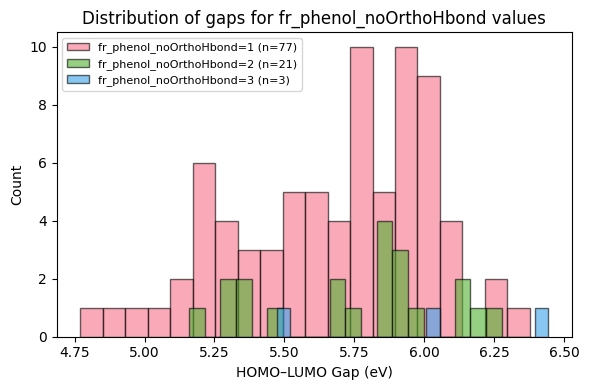

Plotting: fr_phos_acid
Plotting: fr_phos_ester
Plotting: fr_piperdine


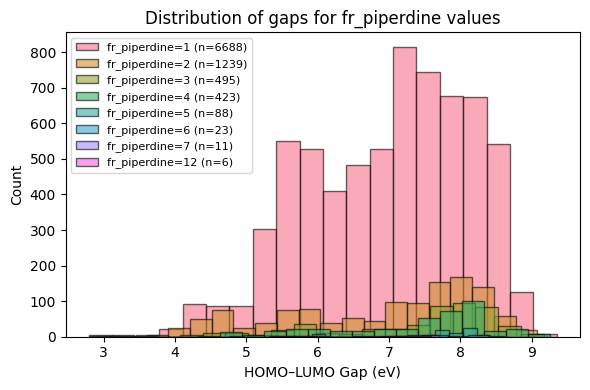

Plotting: fr_piperzine


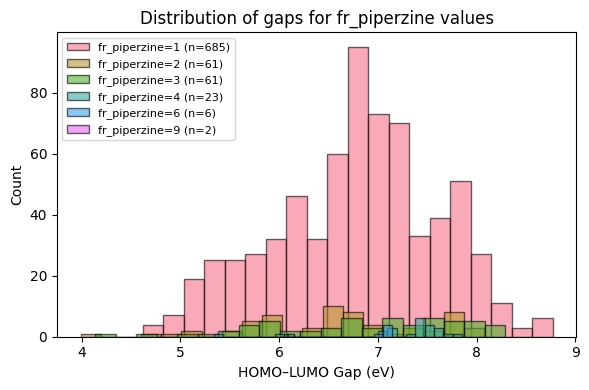

Plotting: fr_priamide


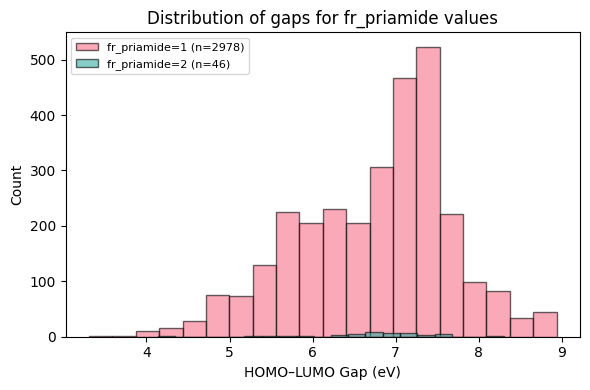

Plotting: fr_prisulfonamd
Plotting: fr_pyridine


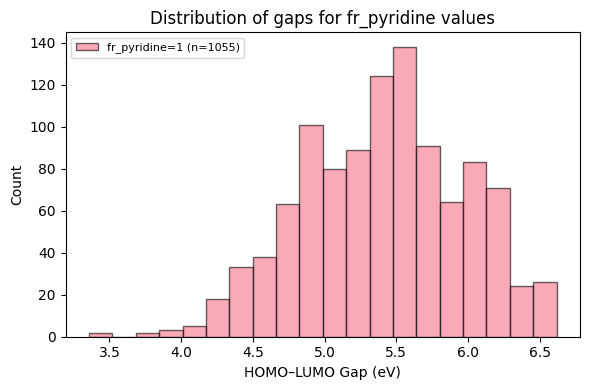

Plotting: fr_quatN


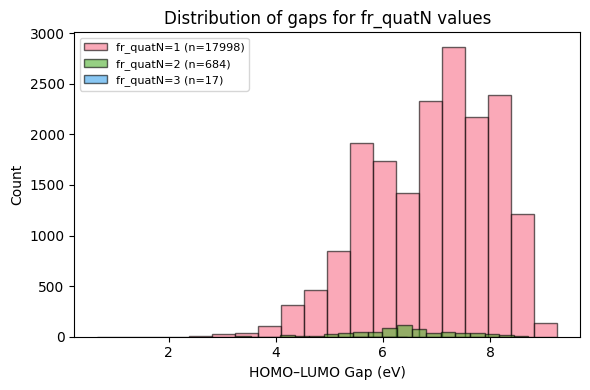

Plotting: fr_sulfide
Plotting: fr_sulfonamd
Plotting: fr_sulfone
Plotting: fr_term_acetylene


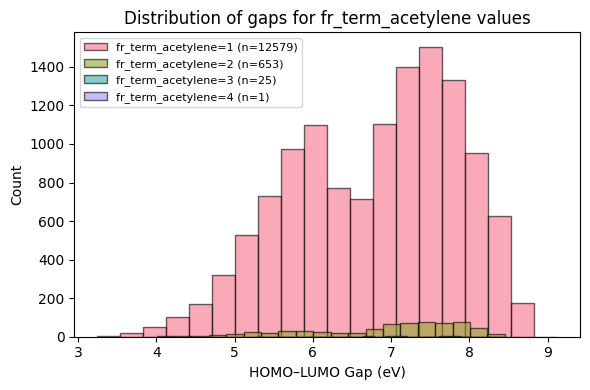

Plotting: fr_tetrazole


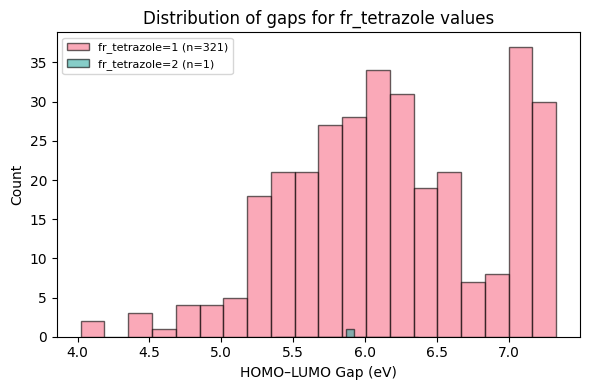

Plotting: fr_thiazole
Plotting: fr_thiocyan
Plotting: fr_thiophene
Plotting: fr_unbrch_alkane


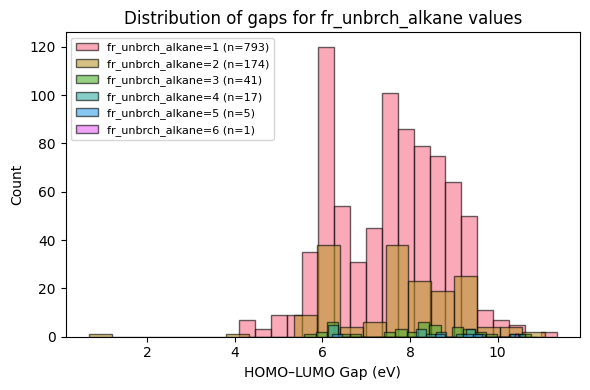

Plotting: fr_urea


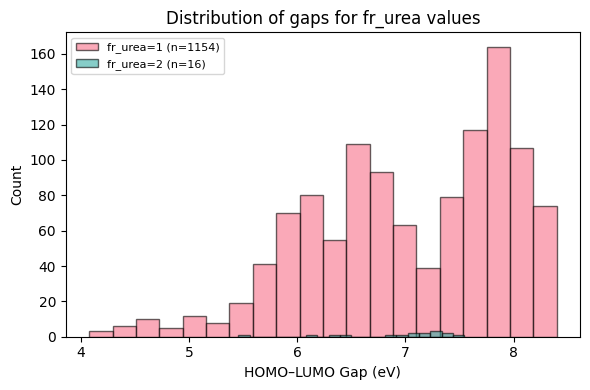

In [ ]:
feature_cols = [c for c in df.columns if c.startswith("Num") or c.startswith("fr")]

for feat in feature_cols:
    print(f"Plotting: {feat}")
    plot_feature_gap_distribution(df, feat)
